In [12]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import log_loss
from sklearn.metrics import make_scorer
from sklearn.cross_validation import StratifiedShuffleSplit
from matplotlib.colors import LogNorm
from sklearn.decomposition import PCA
from keras.layers.advanced_activations import PReLU
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2, activity_l2, l1, activity_l1
from keras.models import Sequential
from keras.utils import np_utils
from copy import deepcopy

import accelerate
import mkl

%matplotlib inline 

In [ ]:
data_path = "data"
features=pd.read_csv(os.path.join(data_path, "features_train.csv"))

In [21]:
trainDF=pd.read_csv(os.path.join(data_path, "train.csv"))

In [14]:
labels=pd.read_csv(os.path.join(data_path, "labels_train.csv"),squeeze=True)
print labels.shape


(438990,)


In [15]:
features=pd.DataFrame(features)

In [16]:
labels.index=range(len(labels))

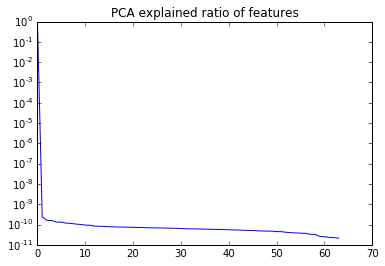

In [17]:
new_PCA=PCA(n_components=64)
new_PCA.fit(features)
plt.plot(new_PCA.explained_variance_ratio_)
plt.yscale('log')
plt.title("PCA explained ratio of features")
features=new_PCA.transform(features)
features=pd.DataFrame(features)

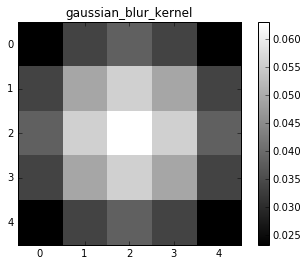

In [18]:
gaussian_blur_kernel_width      = np.int32(5)
gaussian_blur_kernel_half_width = np.int32(2)
gaussian_blur_sigma             = np.float32(2)

y, x = \
    np.mgrid[-gaussian_blur_kernel_half_width:gaussian_blur_kernel_half_width+1,
                -gaussian_blur_kernel_half_width:gaussian_blur_kernel_half_width+1]

gaussian_blur_kernel_not_normalized = np.exp( ( - ( x**2 + y**2 ) ) / ( 2 * gaussian_blur_sigma**2 ) )
normalization_constant              = np.float32(1) / np.sum(gaussian_blur_kernel_not_normalized)
gaussian_blur_kernel                = (normalization_constant * gaussian_blur_kernel_not_normalized).astype(np.float32)


plt.imshow(gaussian_blur_kernel, cmap="gray", interpolation="nearest");
plt.title("gaussian_blur_kernel");
plt.colorbar();



from scipy.ndimage import filters

def P6_convolve(data, convolution_filter):

    convolve_blurred_data = map(lambda d: filters.convolve(
                             d.reshape(8,8), 
                             convolution_filter, 
                             mode="wrap").flatten(), 
                             data)
    
    return convolve_blurred_data

gauss_features = P6_convolve(features.as_matrix(), gaussian_blur_kernel)

In [19]:
def P1(X, Y):

### STUDENT START ###
    Y = Y.astype('category')
    Y = Y.cat.rename_categories(range(len(Y.unique())))
    
    n = Y.nunique() # number of classes rows
    m = 3 # number of examples columns
    
    grid = [[] for x in xrange(n)]
    
    idx = 0
    gridFillCount = 0
    
    t = n*m
    while gridFillCount < t and idx < len(Y): 
                
        if len(grid[int(Y[idx])]) < m:
            grid[int(Y[idx])].append(X[idx])
            gridFillCount += 1
        idx += 1
    

    plt.rc('image', cmap="Greys")
    plt.rc('axes',edgecolor='#cccccc')
    
    fig, ax = plt.subplots(n,m, sharex=True, sharey=True, figsize=(10,39))
    
    
    for i in range(n):
        for j in range(m):
            # Make a 8 x 8 2D array from vector
            x = np.reshape(grid[i][j],(8, 8))
            
#             ax[i,j].set_title(grid[i][j])
            
            ax[i,j].set_xticks([])
            ax[i,j].set_yticks([])
            ax[i,j].imshow(x)
    


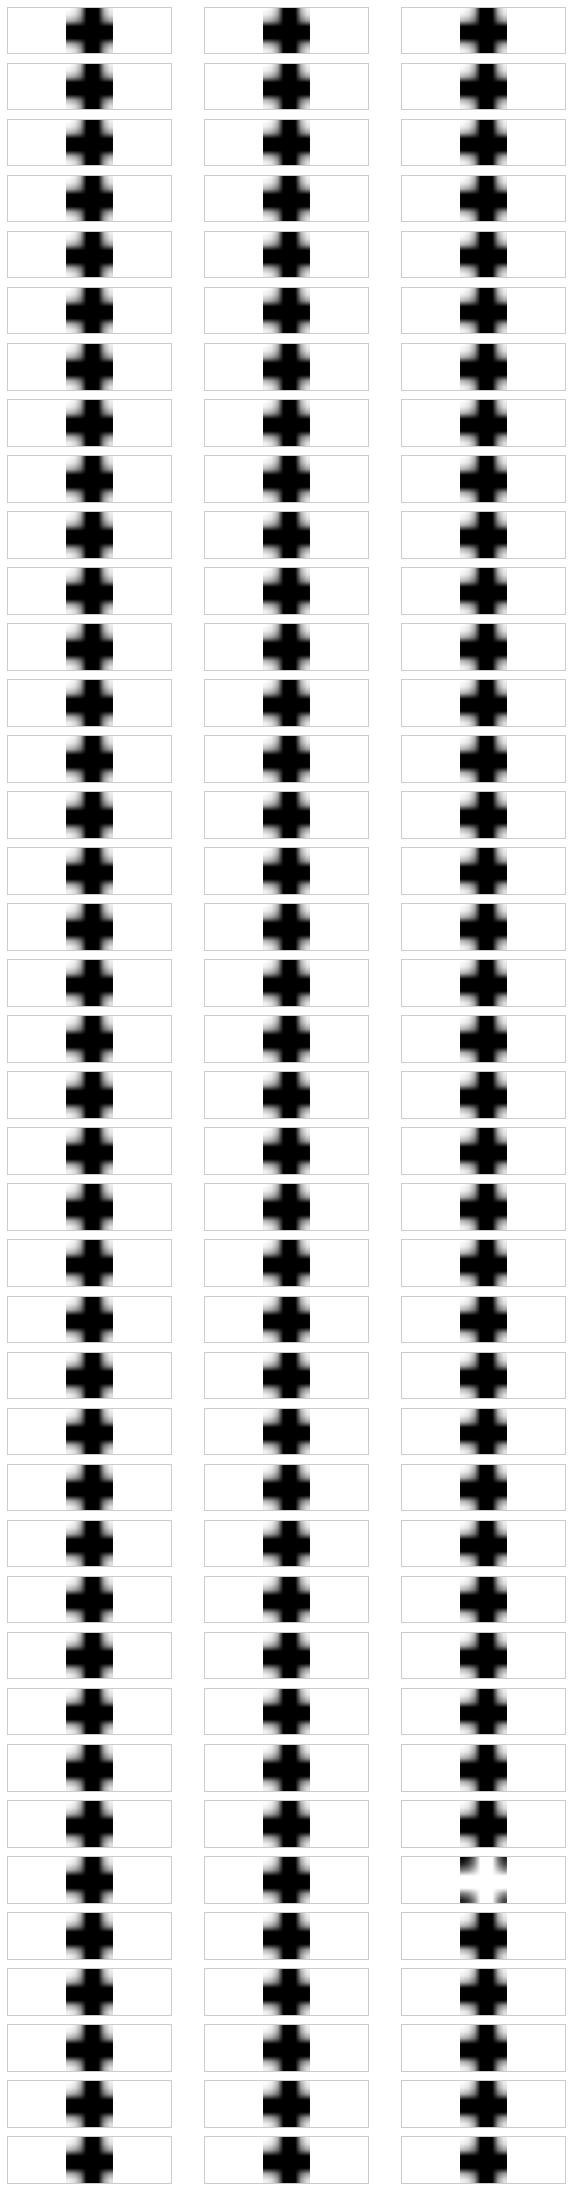

In [20]:
gauss_features=pd.DataFrame(gauss_features)
P1(gauss_features.as_matrix(), pd.Series(labels))

In [ ]:
classifier = LogisticRegression()
lrmodel = classifier.fit(features.as_matrix(),labels)
print "LR score", lrmodel.score(features_test.as_matrix(),labels_test)
print "LR loss test", log_loss(labels_test, lrmodel.predict_proba(features_test.as_matrix()))

In [ ]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot





SVG(model_to_dot(lrmodel).create(prog='dot', format='svg'))